In [39]:
print('Good day vishal!!')

Good day vishal!!


including benign samples of the dataset

In [40]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [41]:
dataset_path = r"E:\OneDrive\Desktop\CLICK\Amrita\SEM 5\PROJECTS\Project_comp_sec\RISS_RansomwareDataset.csv"   
df = pd.read_csv(dataset_path)

import pandas as pd

V = df


In [61]:
print(V.shape)
V.columns


(1523, 30970)


Index(['10001', '1', '2', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6',
       ...
       '0.30925', '0.30926', '0.30927', '0.30928', '0.30929', '0.30930',
       '0.30931', '0.30932', '0.30933', '0.30934'],
      dtype='object', length=30970)

In [43]:
V['2'].value_counts()  #input is 2 as that is the column name you idiot

2
0     942
2     106
6      97
9      90
5      64
7      59
1      50
3      46
11     34
4      25
10      6
8       4
Name: count, dtype: int64

In [44]:
V.isnull().sum()

10001      0
1          0
2          0
0          0
0.1        0
          ..
0.30930    0
0.30931    0
0.30932    0
0.30933    0
0.30934    0
Length: 30970, dtype: int64

In [45]:
V.head(25)

,10001,1,2,0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.30925,0.30926,0.30927,0.30928,0.30929,0.30930,0.30931,0.30932,0.30933,0.30934
0,10002,1,3,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,10003,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10005,1,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10006,1,7,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,10007,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,10008,1,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,10011,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,10013,1,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,10014,1,6,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,10019,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
V.describe()

,10001,1,2,0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.30925,0.30926,0.30927,0.30928,0.30929,0.30930,0.30931,0.30932,0.30933,0.30934
count,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,...,1523.0,1523.000000,1523.000000,1523.000000,1523.0,1523.0,1523.000000,1523.0,1523.0,1523.000000
mean,16806.216678,0.381484,2.029547,0.296126,0.003283,0.692712,0.001970,0.518713,0.027577,0.509521,...,0.0,0.001313,0.000657,0.000657,0.0,0.0,0.000657,0.0,0.0,0.001313
std,4882.539498,0.485910,3.166189,0.456697,0.057222,0.461521,0.044353,0.499814,0.163812,0.500074,...,0.0,0.036226,0.025624,0.025624,0.0,0.0,0.025624,0.0,0.0,0.036226
min,10002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,10807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
50%,20232.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
75%,20754.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
max,21259.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,1.000000


In [47]:
# Drop the first column (index 0) and keep all other columns except for the third column (index 2)
X = V.drop(V.columns[[0, 2]], axis=1)  # Drop both the first (ID) and third (target) columns from features
print(X.head())

# Set the third column (index 2) as the target
Y = V.iloc[:, 2]  # The third column is used as the target

   1  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.30925  0.30926  \
0  1  1    0    1    0    1    0    1    0    0  ...        0        0   
1  1  0    0    0    0    0    0    0    0    0  ...        0        0   
2  1  0    0    0    0    1    0    0    0    0  ...        0        0   
3  1  1    0    1    0    0    1    1    0    1  ...        0        0   
4  1  0    0    0    0    0    0    0    0    0  ...        0        0   

   0.30927  0.30928  0.30929  0.30930  0.30931  0.30932  0.30933  0.30934  
0        0        0        0        0        0        0        0        0  
1        0        0        0        0        0        0        0        0  
2        0        0        0        0        0        0        0        0  
3        0        0        0        0        0        0        0        0  
4        0        0        0        0        0        0        0        0  

[5 rows x 30968 columns]


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [49]:
# Required imports
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

# SVC Model
#svc_model = SVC(kernel='poly', random_state=42)
#svc_model.fit(X_train, y_train)
#y_pred_svc = svc_model.predict(X_test)

# Accuracy and classification report for SVC
#print("SVC Model Accuracy without reduced features:", accuracy_score(y_test, y_pred_svc))
#print("\nSVC Classification Report:\n")
#print(classification_report(y_test, y_pred_svc))

# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42, max_leaf_nodes=500, max_depth=200)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

# Accuracy and classification report for Random Forest
print(f'Accuracy of the Random Forest model without reduced features: {accuracy_score(y_test, y_pred_rfc)}')
print("\nRandom Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rfc))

# CatBoost Classifier
#model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)
#model.fit(X_train, y_train)

#y_pred_catboost = model.predict(X_test)

# Accuracy and classification report for CatBoost
#print(f"CatBoost Model Accuracy: {accuracy_score(y_test, y_pred_catboost)}")
#print("\nCatBoost Classification Report:\n")
#print(classification_report(y_test, y_pred_catboost))


Accuracy of the Random Forest model without reduced features: 0.8655737704918033

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       188
           1       0.89      0.62      0.73        13
           2       0.81      0.57      0.67        23
           3       0.27      0.43      0.33         7
           4       0.60      0.43      0.50         7
           5       0.70      0.78      0.74         9
           6       0.63      0.75      0.69        16
           7       0.75      0.69      0.72        13
           8       0.00      0.00      0.00         1
           9       0.85      0.77      0.81        22
          10       0.50      0.50      0.50         2
          11       0.38      0.75      0.50         4

    accuracy                           0.87       305
   macro avg       0.61      0.61      0.60       305
weighted avg       0.87      0.87      0.87       305



C:\Users\achil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\achil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\achil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Printing the confusion mAtrix


Confusion Matrix for SVC:



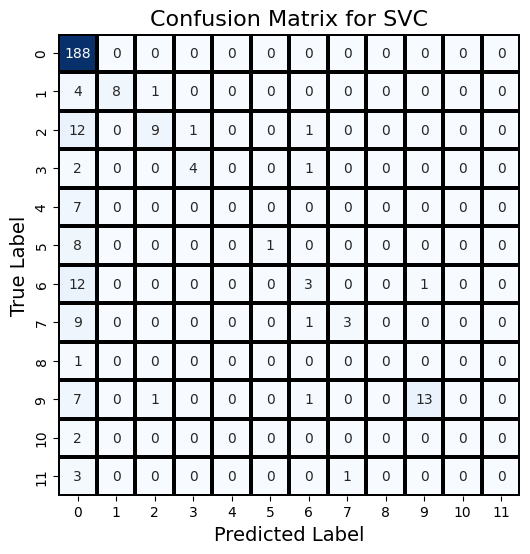


Confusion Matrix for Random Forest:



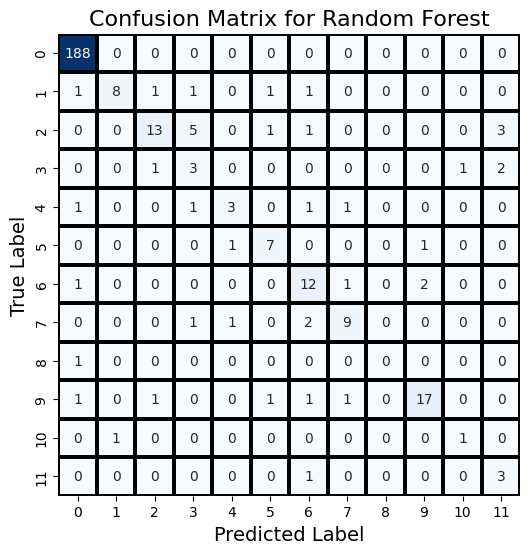


Confusion Matrix for CatBoost:



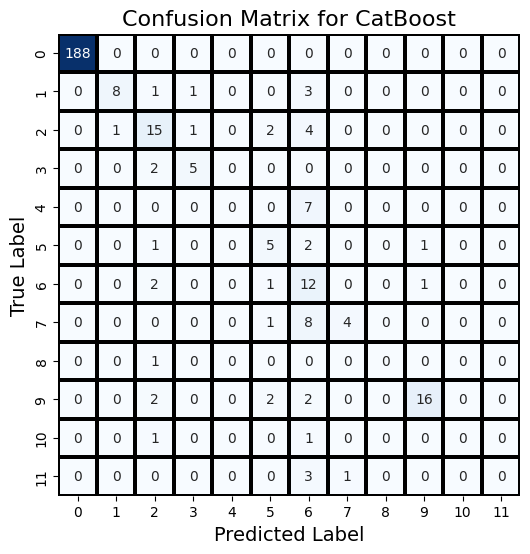

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix with styles
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                linewidths=1.5, linecolor='black', square=True)
    plt.title(f'Confusion Matrix for {model_name}', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.show()

# Example usage
# Confusion Matrix for SVC
print("\nConfusion Matrix for SVC:\n")
plot_confusion_matrix(y_test, y_pred_svc, 'SVC')

# Confusion Matrix for Random Forest
print("\nConfusion Matrix for Random Forest:\n")
plot_confusion_matrix(y_test, y_pred_rfc, 'Random Forest')

# Confusion Matrix for CatBoost
print("\nConfusion Matrix for CatBoost:\n")
plot_confusion_matrix(y_test, y_pred_catboost, 'CatBoost')


In [51]:
#Wth applying reduced features
# Split the dataset into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train (fit) the model using the training data
model.fit(X1_train, y1_train)

# Get feature importance from the trained model
feature_importance = model.feature_importances_

#  DataFrame to display feature names along with their importance
importance_V = pd.DataFrame({
    'Feature': X1_train.columns,          # Feature names
    'Importance': feature_importance     # Corresponding importance scores
})

# Sort the DataFrame by 'Importance' in descending order
importance_V = importance_V.sort_values(by='Importance', ascending=False)

# predictions on the test set
y1_pred = model.predict(X1_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y1_test, y1_pred)
print("RF Model Accuracy:", accuracy)

# Display the feature importance DataFrame (optional)
print("\nFeature Importance:\n", importance_V.head())  # Display top 5 important features

RF Model Accuracy: 0.8721311475409836

Feature Importance:
        Feature  Importance
0            1    0.044250
119      0.112    0.013499
14744     1.14    0.010742
29766  0.29734    0.009785
14264  0.14250    0.008203


Elbow method and Cross validation- to determine best threshold score (YET TO TRY)

In [52]:
# Threshold-based feature selection.
# Selecting only the important features.

# Set a threshold for feature importance
threshold = 0.0007

# Identify important features by comparing their importance to the threshold
important_features = [
    feature for feature, importance in zip(X.columns, feature_importance) 
    if importance > threshold
]

# Create a new DataFrame with only the important features
X_filtered = X[important_features]

# Print the names of the selected important features
print(f"Selected features: {important_features}")

# Print the total number of selected important features
print(f"Number of selected features: {len(important_features)}")

# Print the shapes of training and testing sets
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X1_train, y1_train)  # Use y1_train
y1_pred = rf_model.predict(X1_test)
print("Random Forest Model Accuracy:", accuracy_score(y1_test, y1_pred))  # Use y1_test

# Decision Tree Classifier (might be prone to overfitting, poor generalization?)
# dt_model = DecisionTreeClassifier()
# dt_model.fit(X1_train, y1_train)  # Use y1_train
# y1_pred_dt = dt_model.predict(X1_test)  # Make predictions on the test set
# print("Decision Tree Model Accuracy:", accuracy_score(y1_test, y1_pred_dt))  # Use y1_test

# Support Vector Classifier
svc_model = SVC(kernel='linear', random_state=42)  # You can also try 'rbf', 'poly', etc. for the kernel
svc_model.fit(X1_train, y1_train)  # Use y1_train
y1_pred_svc = svc_model.predict(X1_test)  # Make predictions on the test set
print("SVC Model Accuracy:", accuracy_score(y1_test, y1_pred_svc))  # Use y1_test


Selected features: ['1', '0', '0.2', '0.4', '0.6', '0.8', '0.12', '0.13', '0.14', '0.17', '0.21', '0.22', '0.27', '0.28', '0.32', '1.1', '0.38', '0.51', '1.3', '0.57', '0.58', '0.59', '0.60', '0.61', '0.62', '0.63', '0.64', '0.65', '0.68', '0.69', '0.72', '0.74', '0.76', '0.77', '0.79', '0.83', '0.88', '1.5', '0.91', '0.93', '0.95', '0.96', '0.98', '0.99', '1.6', '0.101', '0.103', '0.107', '0.112', '0.114', '0.116', '0.117', '0.118', '0.121', '0.122', '0.123', '0.126', '0.127', '0.128', '0.130', '0.132', '0.133', '0.135', '0.137', '0.138', '0.140', '0.143', '0.144', '0.145', '0.146', '0.148', '0.149', '0.153', '0.154', '0.155', '0.156', '0.158', '0.159', '0.160', '0.161', '0.162', '1.8', '0.168', '0.169', '0.170', '0.173', '0.174', '0.177', '0.178', '0.180', '0.182', '0.183', '0.186', '0.187', '0.189', '0.190', '0.192', '0.194', '0.197', '0.199', '0.200', '0.202', '0.203', '0.207', '0.212', '0.213', '0.214', '0.216', '0.218', '0.220', '0.317', '0.528', '0.532', '0.717', '0.745', '0.805

In [53]:
#Threshold-based feature selection.
#selecting only the important features!!

# Set a threshold for feature importance
threshold = 0.0096

# Identify important features by comparing their importance to the threshold
important_features = [
    feature for feature, importance in zip(X.columns, feature_importance) 
    if importance > threshold
]

# Create a new DataFrame with only the important features
X_filtered = X[important_features]

# Print the names of the selected important features
print(f"Selected features: {important_features}")

# Print the total number of selected important features
print(f"Number of selected features: {len(important_features)}")

# Identify important features by comparing their importance to the threshold
important_features_with_scores = [
    (feature, importance) for feature, importance in zip(X.columns, feature_importance) 
    if importance > threshold
]

# Print the names and importance scores of the selected important features
print("Important Features and Their Importance Scores:")
for feature, importance in important_features_with_scores:
    print(f"Feature: {feature}, Importance Score: {importance:.6f}")  # You can adjust the decimal precision here

# Print the total number of selected important features
print(f"\nTotal number of selected features: {len(important_features_with_scores)}")



Selected features: ['1', '0.112', '1.14', '0.29734']
Number of selected features: 4
Important Features and Their Importance Scores:
Feature: 1, Importance Score: 0.044250
Feature: 0.112, Importance Score: 0.013499
Feature: 1.14, Importance Score: 0.010742
Feature: 0.29734, Importance Score: 0.009785

Total number of selected features: 4


In [54]:
#  select features and the target variable
X1 = V[ ['1', '0', '0.2', '0.4', '0.6', '0.8', '0.12', '0.13', '0.14', '0.17', '0.21', '0.22', '0.27', '0.28', '0.32', '1.1', '0.38', '0.51', '1.3', '0.57', '0.58', '0.59', '0.60', '0.61', '0.62', '0.63', '0.64', '0.65', '0.68', '0.69', '0.72', '0.74', '0.76', '0.77', '0.79', '0.83', '0.88', '1.5', '0.91', '0.93', '0.95', '0.96', '0.98', '0.99', '1.6', '0.101', '0.103', '0.107', '0.112', '0.114', '0.116', '0.117', '0.118', '0.121', '0.122', '0.123', '0.126', '0.127', '0.128', '0.130', '0.132', '0.133', '0.135', '0.137', '0.138', '0.140', '0.143', '0.144', '0.145', '0.146', '0.148', '0.149', '0.153', '0.154', '0.155', '0.156', '0.158', '0.159', '0.160', '0.161', '0.162', '1.8', '0.168', '0.169', '0.170', '0.173', '0.174', '0.177', '0.178', '0.180', '0.182', '0.183', '0.186', '0.187', '0.189', '0.190', '0.192', '0.194', '0.197', '0.199', '0.200', '0.202', '0.203', '0.207', '0.212', '0.213', '0.214', '0.216', '0.218', '0.220', '0.317', '0.528', '0.532', '0.717', '0.745', '0.805', '0.807', '0.820', '0.823', '0.837', '0.900', '0.906', '0.993', '0.1094', '0.1127', '0.1170', '0.1185', '0.1201', '0.1205', '0.1210', '0.1255', '0.1270', '0.1315', '0.1391', '0.1421', '0.1524', '0.1617', '0.1646', '0.1744', '0.1755', '0.1792', '0.1825', '0.1866', '0.1881', '0.1935', '0.2003', '0.2022', '0.2268', '0.2333', '0.2345', '0.2422', '0.2426', '0.2489', '0.2514', '0.2530', '0.2536', '0.2540', '0.2579', '0.2590', '0.2593', '0.2760', '0.2800', '0.2814', '0.2848', '0.2871', '0.2902', '0.2946', '0.2949', '0.2952', '0.3101', '0.3162', '0.3175', '0.3231', '0.3239', '0.3294', '0.3301', '0.3385', '0.3406', '0.3653', '0.3667', '0.3677', '0.3688', '0.3777', '0.3783', '0.3797', '0.3803', '0.3806', '0.3851', '0.3882', '0.3925', '1.12', '0.3964', '0.4001', '0.4079', '0.4089', '0.4292', '0.4368', '0.4507', '0.4605', '0.4685', '0.4698', '0.4732', '0.5200', '0.5225', '0.5270', '0.5281', '0.5282', '0.5316', '0.5519', '0.5557', '0.5586', '0.5597', '0.5608', '0.5979', '0.7004', '0.7104', '0.7268', '0.7402', '0.7694', '0.7951', '0.7965', '0.8475', '0.8499', '0.8507', '0.8857', '0.9181', '0.9332', '0.9383', '0.9408', '0.9574', '0.10003', '0.10250', '0.10588', '0.11336', '0.11386', '0.11460', '0.11562', '0.11570', '0.11575', '0.11669', '0.11765', '0.11799', '0.11899', '0.11909', '0.11911', '0.12026', '0.12046', '0.12227', '0.12231', '0.12352', '0.12750', '0.12855', '0.13228', '0.13356', '0.13655', '0.13940', '0.14101', '0.14123', '0.14250', '0.14727', '1.14', '0.15151', '0.15234', '0.15250', '0.15465', '0.15486', '0.16163', '0.16317', '0.16480', '0.17115', '0.17117', '0.17277', '0.17490', '0.18074', '0.18233', '0.18331', '0.18428', '0.19078', '0.19155', '0.19983', '0.20025', '0.20140', '0.20197', '0.20239', '0.20833', '0.20868', '0.20980', '0.21060', '0.21507', '0.21962', '0.22297', '0.22396', '0.22473', '0.22619', '0.23024', '0.23187', '0.23260', '0.23503', '0.23648', '0.23698', '0.24486', '0.24539', '0.24673', '0.24701', '0.24761', '0.24873', '0.25161', '0.25273', '0.26334', '0.26521', '0.26992', '0.27263', '0.27365', '0.27593', '0.27842', '0.28616', '0.28923', '0.29045', '0.29253', '0.29257', '0.29521', '0.29723', '0.29734', '0.29868', '0.30022', '0.30165', '0.30249']]

y1 = V['2']


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42, shuffle=True)

In [56]:
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)


(1218, 327) (305, 327) (1218,) (305,)


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X1_train, y1_train)  # Use y1_train
y1_pred = rf_model.predict(X1_test)
print("Random Forest Model Accuracy:", accuracy_score(y1_test, y1_pred))  # Use y1_test

#Decision Tree Classifier (might be prone to overfitting, poor genralizattion? )
#dt_model = DecisionTreeClassifier()
#dt_model.fit(X1_train, y1_train)  # Use y1_train
#y1_pred_dt = dt_model.predict(X1_test)  # Make predictions on the test set
#print("Decision Tree Model Accuracy:", accuracy_score(y1_test, y1_pred_dt))  # Use y1_test

# Support Vector Classifier
svc_model = SVC(kernel='linear', random_state=42)  # You can also try 'rbf', 'poly', etc. for the kernel
svc_model.fit(X1_train, y1_train)  # Use y1_train
y1_pred_svc = svc_model.predict(X1_test)  # Make predictions on the test set
print("SVC Model Accuracy:", accuracy_score(y1_test, y1_pred_svc))  # Use y1_test


Random Forest Model Accuracy: 0.8786885245901639
SVC Model Accuracy: 0.8786885245901639


Applying PCA

In [58]:
# Standardizing the features before applying PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying PCA - reduce dimensions while retaining 95% variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize classifiers
rfc = RandomForestClassifier(n_estimators=1000, random_state=42)
svc = SVC(kernel='linear', random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

# List of classifiers
models = {'Random Forest': rfc, 'SVC': svc, 'Logistic Regression': lr}

# Train, predict, and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    
    # Print Accuracy and Classification Report
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))


Training Random Forest...

Random Forest Accuracy: 0.8360655737704918

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       188
           1       0.88      0.54      0.67        13
           2       0.75      0.65      0.70        23
           3       0.33      0.43      0.38         7
           4       0.67      0.29      0.40         7
           5       0.71      0.56      0.62         9
           6       0.53      0.56      0.55        16
           7       0.64      0.54      0.58        13
           8       0.00      0.00      0.00         1
           9       0.80      0.73      0.76        22
          10       0.50      0.50      0.50         2
          11       0.33      0.50      0.40         4

    accuracy                           0.84       305
   macro avg       0.59      0.52      0.54       305
weighted avg       0.83      0.84      0.83       305


Training SVC...


C:\Users\achil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\achil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\achil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati


SVC Accuracy: 0.8098360655737705

SVC Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       188
           1       0.67      0.62      0.64        13
           2       0.61      0.61      0.61        23
           3       0.31      0.57      0.40         7
           4       0.44      0.57      0.50         7
           5       0.75      0.67      0.71         9
           6       0.53      0.56      0.55        16
           7       0.54      0.54      0.54        13
           8       0.00      0.00      0.00         1
           9       0.81      0.77      0.79        22
          10       0.00      0.00      0.00         2
          11       0.29      0.50      0.36         4

    accuracy                           0.81       305
   macro avg       0.49      0.53      0.50       305
weighted avg       0.83      0.81      0.82       305


Training Logistic Regression...

Logistic Regression Accuracy: 0.8032

C:\Users\achil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\achil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\achil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [59]:
model = CatBoostClassifier(iterations = 1000, learning_rate = 0.1, depth = 6, loss_function = 'Logloss', eval_metric = 'Accuracy', verbose = 200, random_seed = 42)
model.fit(X_train_pca, y_train, eval_set=(X_test_pca, y_test), early_stopping_rounds= 50)
y_pred = model.predict(X_test_pca)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

CatBoostError: catboost/private/libs/target/target_converter.cpp:410: Target with classes must contain only 2 unique values for binary classification